A continuación analizaremos la distribución de velocidades de Maxwell-Boltzmann para diferentes moleculas y particulas. Analizaremos la distribución en diferentes ordenes de temperaturas (ordenes de potencias de *10° C*).

Analizaremos también las velocidades más probables, velocidades media y cuadraticas media en cada situación, y a partir de estas entregar conclusiones sobre el *Escape Atmosferico* en la Tierra y Marte; además de esto daremos información sobre la composición atmosferica en algunos planetas del sistema solar.

#**Calculo Numérico**

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
mu = 1.6605402e-27
k = 1.380649e-23
masas = np.array([4.002602, 2*1.00784, 2*15.999, 2*14.0067, 39.948, 2*1.00784 + 15.999, 12.011 + 15.999, 12.011 + 2*15.999, 12.011 + 4*1.00784])*(mu) #Masas de las moleculas
moleculas = np.array(["Helio", "H2", "O2", "N2", "Ar", "H2O", "CO", "CO2", "CH4"])
T = np.array([-10**j for j in range(2,0,-1)]+[10**i for i in range(0,5)]) + 273.15
vs = np.linspace(0, 10000, 1000)

In [89]:
def dist_vel(m, T_, v):
  f = 4*np.pi*(v**2) * ((m/(2*np.pi*k*T_))**1.5) *np.exp(-m*(v**2)/(2*k*T_))
  return f

def velocidades(m, T_):
  v_mp = np.sqrt(2*k*T_/m)
  v_m = np.sqrt(8*k*T_/(m*np.pi))
  v_cm = np.sqrt(3*k*T_/m)
  return v_mp, v_m, v_cm

In [90]:
f_vs = np.empty((9,7), dtype=object)
for i in range(9):
  for j in range(7):
    f_v = dist_vel(masas[i], T[j], vs)
    f_vs[i, j] = f_v

In [91]:
v_mps =[]
v_ms = []
v_cms = []
for m_ in masas:
  v_mp, v_m, v_cm = velocidades(m_, T)
  v_mps.append(v_mp)
  v_ms.append(v_m)
  v_cms.append(v_cm)

In [92]:
v_escape_t = np.array([11183, 7400])
v_escape_m = np.array([5030, 3600])

escapa_t = np.logical_and(v_ms >= v_escape_t[-1], v_ms <= v_escape_t[0])
escapa_m = np.logical_and(v_ms >= v_escape_m[-1], v_ms <= v_escape_m[0])



---



#**Distribución de velocidades de Maxwell-Boltzmann**

Esta es una función que describe la distribución de las velocidades de las partículas en un gas ideal a una temperatura dada. Es crucial para entender propiedades termodinámicas y procesos físicos como la difusión, la velocidad de reacción y la conductividad térmica en los gases. La distribución también puede usarse para estimar la fracción de partículas con velocidades superiores a cierto valor, lo que es útil para analizar colisiones o interacciones en sistemas gaseosos.

$$f(v)=4\pi v^2\bigg(\frac{m}{2\pi kT}\bigg)^{3/2}e^{-\frac{mv^2}{2kT}}$$

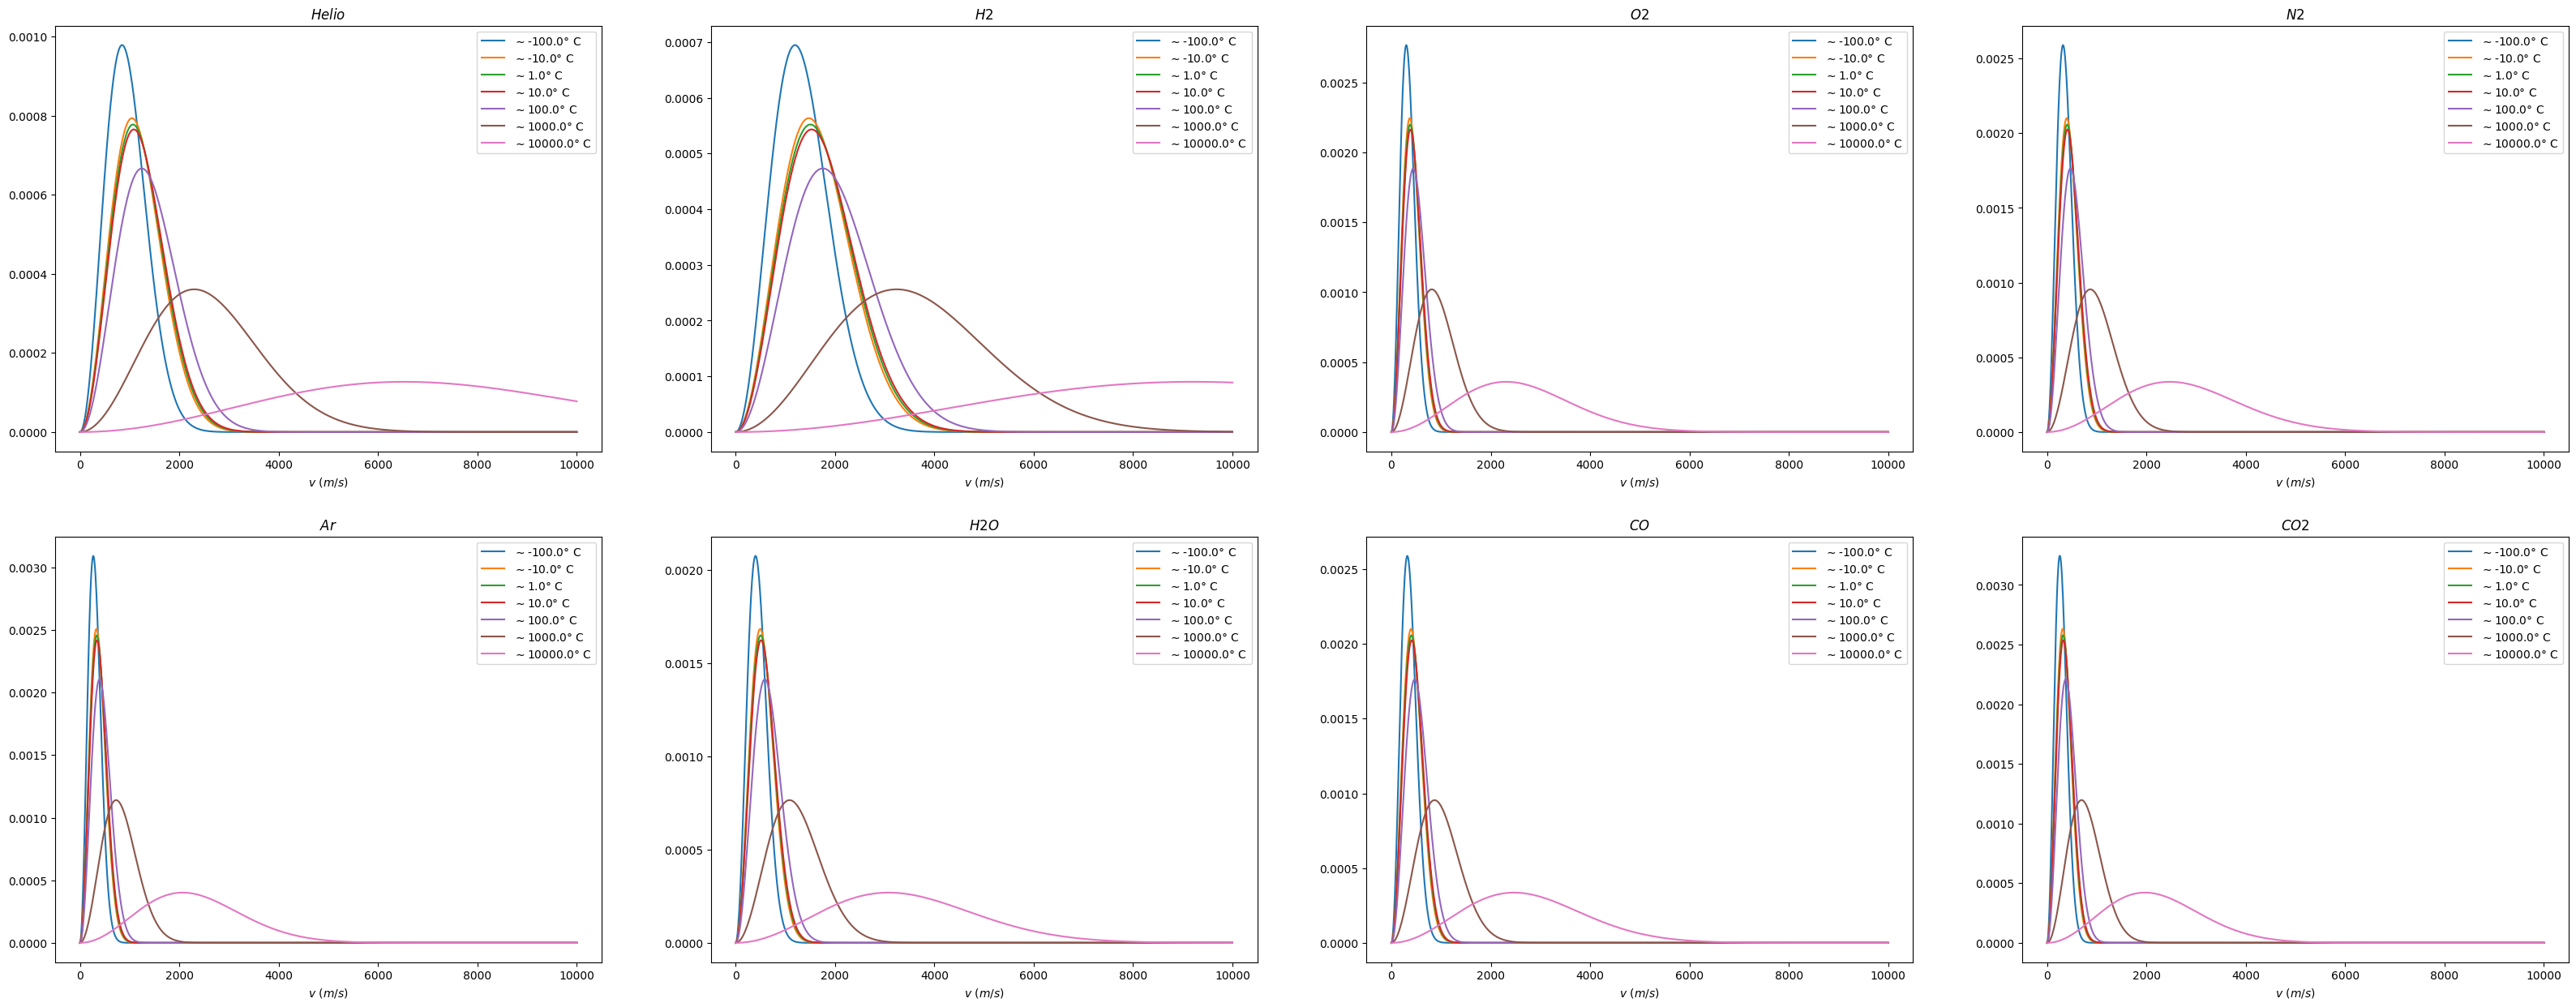

In [93]:
plt.figure(figsize = (40,15))
for j in range(8):
  plt.subplot(2, 4, j + 1)
  plt.title(f"${moleculas[j]}$")
  for i in range(7):
    plt.plot(vs, f_vs[j,i], label = f"$\sim${np.round(T[i] - 273.15)}° C")
  plt.legend()
  plt.xlabel("$v$ ($m/s$)")

De los anteriores graficos llegamos a las siguientes conclusiones.



1.   La distribución de velocidades de Maxwell-Boltzmann es una curva de campana que describe cómo se distribuyen las velocidades de las partículas en un gas en equilibrio térmico. La mayoría de las partículas tienen velocidades cercanas a la velocidad más probable y pocas partículas tienen velocidades muy altas.
2.   La distribución depende de la temperatura del gas. A temperaturas más altas, la curva es más ancha, lo que indica una mayor dispersión de velocidades. A temperaturas más bajas, la curva se vuelve más estrecha.
3.   La masa de las partículas afecta la dispersión y la forma de la curva de la distribución. Partículas más ligeras tendrán velocidades más altas en promedio que las partículas más pesadas a una misma temperatura.






---



#**Velocidad más probable, Velocidad media y Velocidad cuadratica media**

La velocidad que tiene la máxima probabilidad de ocurrencia se llama velocidad más probable ($v_{mp}$) y se encuentra en el punto donde la derivada de la función $f(v)$ con respecto a $v$ es igual a cero. En términos de las variables de la ecuación, la velocidad más probable se calcula como:

$$v_{mp}=\sqrt{\frac{2kT}{m}}$$

La velocidad media es simplemente el promedio de todas las velocidades de las partículas en un gas.

La velocidad cuadrática media es un valor más representativo de la distribución de velocidades en comparación con la velocidad media. Dado que las velocidades de las partículas siguen una distribución de Maxwell-Boltzmann, el valor $v_cm$ es útil para describir la velocidad típica de las partículas en el gas.

Sus relación es directamente proporcional a la temperatura e inversamente proporcional a la masa. Esto tiene sentido intuitivamente: a medida que la temperatura aumenta, las partículas ganan energía cinética y se mueven más rápido; mientras que partículas más ligeras se mueven más rápido que las más pesadas a la misma temperatura.

$$ v_{m}=\sqrt{\frac{8kT}{\pi m}} \hspace{2cm} v_{cm}=\sqrt{\frac{3kT}{m}}$$

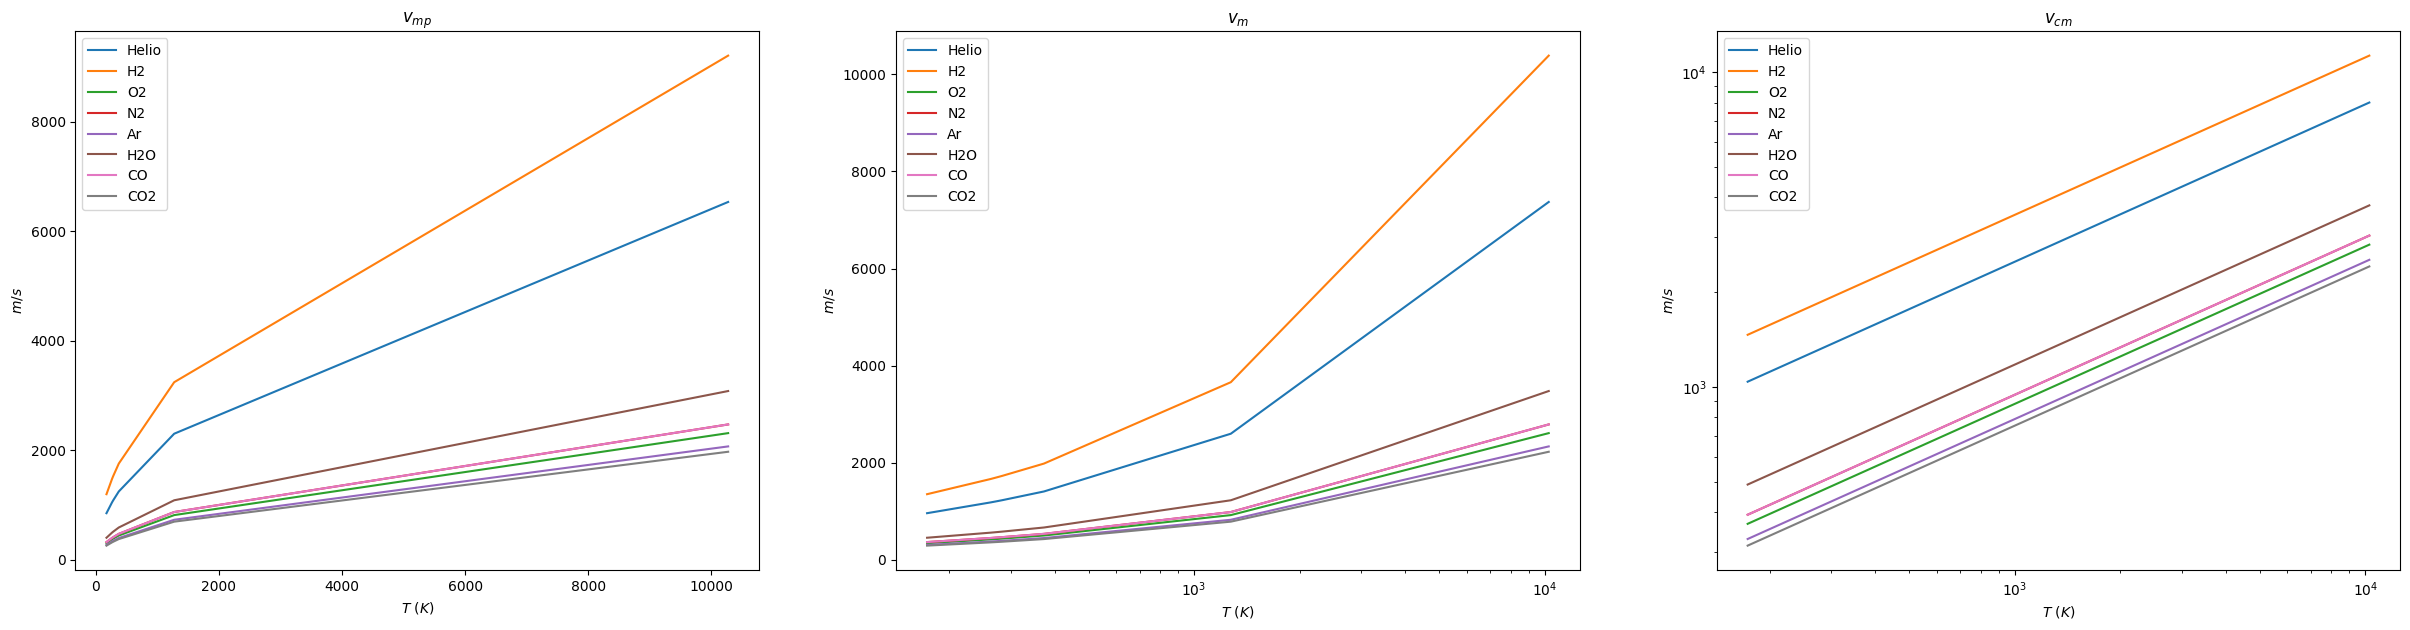

In [94]:
plt.figure(figsize = (30,7))
plt.subplot(1, 3, 1)  # 3 filas, 1 columna, primer gráfico
for i in range(8):
  plt.plot(T, v_mps[i], label = moleculas[i])
plt.title("$v_{mp}$")
plt.ylabel("$m/s$")
plt.xlabel("$T$ ($K$)")
plt.legend()

plt.subplot(1, 3, 2)
for i in range(8):
  plt.plot(T, v_ms[i], label = moleculas[i])
plt.title("$v_m$")
plt.ylabel("$m/s$")
plt.xlabel("$T$ ($K$)")
plt.legend()
plt.xscale("log")

plt.subplot(1,3,3)
for i in range(8):
  plt.plot(T, v_cms[i], label = moleculas[i])
plt.title("$v_{cm}$")
plt.ylabel("$m/s$")
plt.xlabel("$T$ ($K$)")
plt.legend()
plt.xscale("log")
plt.yscale("log")

Una forma de distinguir entre los diferentes tipos de velocidad es la siguiente:

 La velocidad más probable se enfoca en la velocidad más frecuente, la velocidad media ofrece una visión promedio general y la velocidad cuadrática media está relacionada con la energía cinética promedio de las partículas.

En el anterior grafico se muestran los tipos de velocidad en diferentes visualizaciones de los ejes. Esto para dar distintas perspectivas del comportamiento de la velocidad en temperaturas cercanas y lejanas

 La siguiente Tabla muestra de forma más resumida, las velocidades más probables de cada molecula en su respectiva temperatura. $v[m/s]$.

 Se observa claramente que las particulas de $H_2$ son las que adquieren velocidades mayores en función de su temperatura, mientras que el $Ar$ y $CO$ son las que menos se excitan ante el cambio de temperatura

 *No se muestran las otras velocidades pues sus valores siguen aproximadamente la misma ecuación y entrega valores similares.

In [95]:
pd.DataFrame(v_mps[:-1], index = moleculas[:-1], columns = [f"~ {round(t -273.25)}° C"for t in T])

,~ -100° C,~ -10° C,~ 1° C,~ 10° C,~ 100° C,~ 1000° C,~ 10000° C
Helio,848.148671,1045.592418,1067.222231,1084.598554,1245.094920,2299.855369,6532.998416
H2,1195.177467,1473.407364,1503.887238,1528.373264,1754.538377,3240.864966,9206.042247
O2,299.972728,369.804518,377.454537,383.600185,440.364446,813.411508,2310.587076
N2,320.597609,395.230742,403.406746,409.974943,470.642079,869.338309,2469.453459
Ar,268.469942,330.968079,337.814702,343.314941,394.117886,727.987980,2067.931917
H2O,399.788147,492.856347,503.051897,511.242499,586.894972,1084.072814,3079.431025
CO,320.617066,395.254729,403.431229,409.999824,470.670643,869.391070,2469.603332
CO2,255.783450,315.328249,321.851337,327.091663,375.493925,693.587055,1970.212212




---



#**Estructura de la atmosfera terrestre**

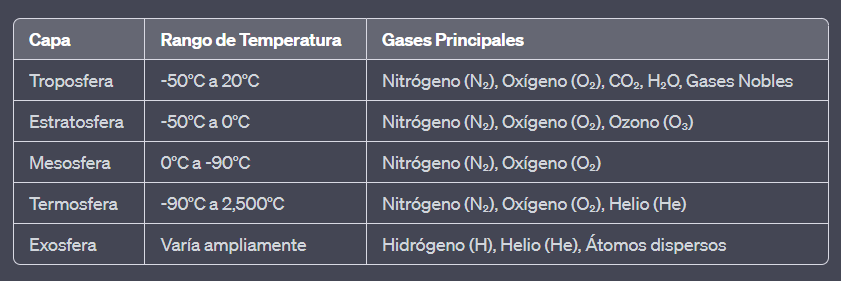

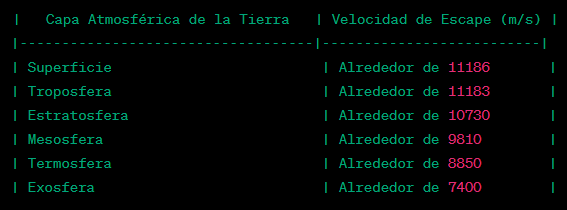

En la siguiente Tabla se muestra si la velocidad más probable de cada molecula (a una $T$ dada) alcanza las velocidades de escape en las distintas capas de la atmosfera terrestre.

Como se observa, en esta situación ninguna de las moleculas alcanza el *Escape Atmosferico* en ningún valor de temperatura; sin embargo, este analizis se da sobre la velocidad más probable. Realmente pueden haber particulas que se encuentran en regiones lejanas de la distribución que alcancen la velocidad de escape.

In [96]:
pd.DataFrame(escapa_t[:-1], index = moleculas[:-1], columns = [f"~ {round(t -273.25)}° C"for t in T])

,~ -100° C,~ -10° C,~ 1° C,~ 10° C,~ 100° C,~ 1000° C,~ 10000° C
Helio,False,False,False,False,False,False,False
H2,False,False,False,False,False,False,True
O2,False,False,False,False,False,False,False
N2,False,False,False,False,False,False,False
Ar,False,False,False,False,False,False,False
H2O,False,False,False,False,False,False,False
CO,False,False,False,False,False,False,False
CO2,False,False,False,False,False,False,False


#**Distribución en Marte**

Con las siguientes tablas notamos que la composición atmosferica es similar a la de la Tierra y sus rangos de temperatura no se alejan bastante de los de nuestra atmosfera. Por lo anterior podemos utilizar la anterior distribución de velocidades calculadas

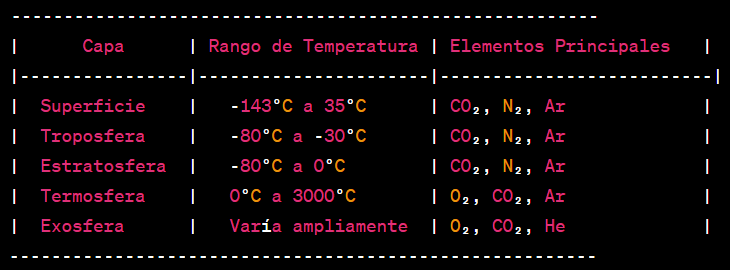

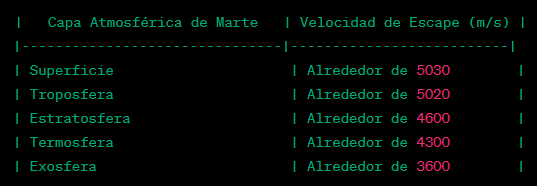

En la siguiente Tabla se muestra si la velocidad más probable de cada molecula (a una $T$ dada) alcanza las velocidades de escape en las distintas capas de la atmosfera marciana.

Como se observa, en esta situación las moleculas de $H_2$ y $N$ alcanzan la velocidad de escape a *1000 °C* y *10000°C* respectivamente.

Este ultimo caso de la molecula de *Nitrogeno* no tiene sentido físico alguno pues la atmosfera de marte no alcanza estas temperaturas.

El caso de la molecula de $H_2$ es más interesante pues aunque la atmosfera de Marte alcanza la temperatura en la que esta molecula escapa, esta molecula no está presente en la atmosfera.

Lo anterior nos dice que ninguna de las moleculas presentes en la atmosfera de Marte alcanza el *Escape Atmosferico* en ningún valor de temperatura; sin embargo, este analizis se da sobre la velocidad más probable. Realmente pueden haber particulas que se encuentran en regiones lejanas de la distribución que alcancen la velocidad de escape.

In [97]:
pd.DataFrame(escapa_m[:-1], index = moleculas[:-1], columns = [f"~ {round(t -273.25)}° C"for t in T])

,~ -100° C,~ -10° C,~ 1° C,~ 10° C,~ 100° C,~ 1000° C,~ 10000° C
Helio,False,False,False,False,False,False,False
H2,False,False,False,False,False,True,False
O2,False,False,False,False,False,False,False
N2,False,False,False,False,False,False,False
Ar,False,False,False,False,False,False,False
H2O,False,False,False,False,False,False,False
CO,False,False,False,False,False,False,False
CO2,False,False,False,False,False,False,False




---



#**Composición Atmosférica en Planetas**

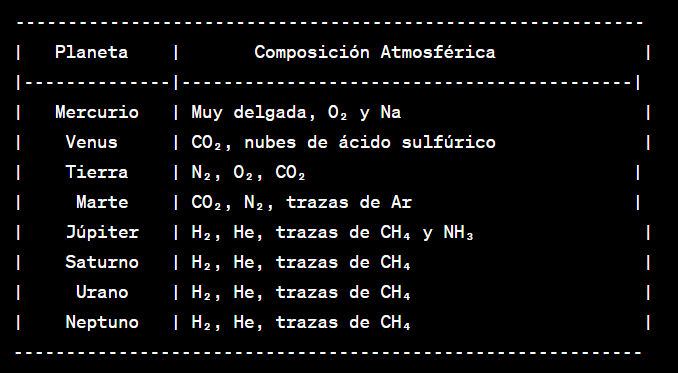

Se muestra brevemente la composición atmosferica de cada planeta en el sistema solar. Observamos que en los planetas gigantes, se hace más común la presencia de *Metano* ($CH_4$).

Para este caso se muestra brevemente la distribución para esta molecula.

*No se muestran los demás analizis

Text(0.5, 0, '$v$ ($m/s$)')

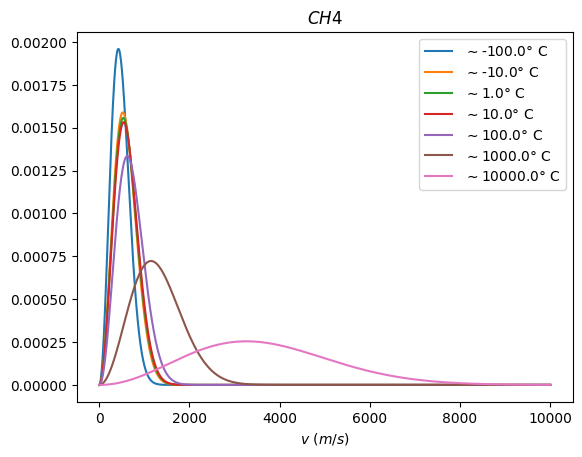

In [100]:
plt.title(f"${moleculas[-1]}$")
for i in range(7):
  plt.plot(vs, f_vs[8,i], label = f"$\sim${np.round(T[i] - 273.15)}° C")
plt.legend()
plt.xlabel("$v$ ($m/s$)")